In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# CLIMATE DAU 
partida_dau = pd.read_csv("dades/dades_csv/climatedau/game_partida.csv", delimiter=',' , encoding="latin-1")
ronda_dau = pd.read_csv("dades/dades_csv/climatedau/game_ronda.csv", delimiter=',' , encoding="latin-1")
user_dau = pd.read_csv("dades/dades_csv/climatedau/game_user.csv", delimiter=',' , encoding="latin-1")
user_dau.drop(user_dau.index[3], inplace=True)
userronda_dau = pd.read_csv("dades/dades_csv/climatedau/game_userronda.csv", delimiter=',' , encoding="latin-1")


In [3]:
# CLIMATE STREET 
partida_street = pd.read_csv("dades/dades_csv/climatestreet/game_partida_street.csv", delimiter=',' , encoding="latin-1")
ronda_street = pd.read_csv("dades/dades_csv/climatestreet/game_ronda_street.csv", delimiter=',' , encoding="latin-1")
user_street = pd.read_csv("dades/dades_csv/climatestreet/game_user_street.csv", delimiter=',' , encoding="latin-1")
userronda_street = pd.read_csv("dades/dades_csv/climatestreet/game_userronda_street.csv", delimiter=',' , encoding="latin-1")

In [4]:
# CLIMATE VIL
partida_vil = pd.read_csv("dades/dadesvil/partida.csv", delimiter=',' , encoding="latin-1")
ronda_vil = pd.read_csv("dades/dadesvil/ronda.csv", delimiter=',' , encoding="latin-1")
user_vil = pd.read_csv("dades/dadesvil/user.csv", delimiter=',' , encoding="latin-1")
userronda_vil = pd.read_csv("dades/dadesvil/userronda.csv", delimiter=',' , encoding="latin-1")

In [5]:
user_street.rename(columns={'id': 'user_id'}, inplace=True)
user_vil.rename(columns={'id': 'user_id'}, inplace=True)

In [6]:
user_dau.columns

Index(['user_id', 'nickname', 'codi_postal', 'genere', 'rang_edat',
       'nivell_estudis', 'prfinal0', 'prfinal1', 'prfinal2', 'prfinal3',
       'prfinal4', 'prfinal5', 'prfinal6', 'prfinal7', 'prfinal8', 'prfinal9',
       'prfinal10', 'prfinal11', 'prfinal12', 'prfinal13', 'data_creacio',
       'data_finalitzacio', 'acabat', 'data_registre', 'diners_inicials',
       'diners_actuals', 'check_1', 'check_2', 'check_3', 'partida_id',
       'is_robot', 'num_jugador', 'prfinal14', 'prfinal15', 'guany_final',
       'num_seleccions', 'sorteig'],
      dtype='object')

In [7]:
user_dau.head()

,user_id,nickname,codi_postal,genere,rang_edat,nivell_estudis,prfinal0,prfinal1,prfinal2,prfinal3,...,check_2,check_3,partida_id,is_robot,num_jugador,prfinal14,prfinal15,guany_final,num_seleccions,sorteig
0,1,Nitahorse,8203,d,28,r4,NaN,r1,r1,r4,...,False,False,1,0,3,r3,r2,12,10,1
1,2,Max demoran,8028,h,45,r4,NaN,r1,r1,r1,...,False,False,1,0,6,r2,r2,14,10,1
2,3,Ellas,8027,h,15,r2,NaN,r1,r1,r2,...,False,False,1,0,2,r4,r4,28,10,1
4,5,Peripam,8440,h,24,r6,NaN,r1,r2,r2,...,False,False,2,0,6,r3,r4,10,10,1
5,6,Pato,8027,d,14,r2,NaN,r1,r2,r2,...,False,False,1,0,1,r1,r3,16,10,1


In [8]:
ronda_dau.head()

,id,num_ronda,bucket_inici_ronda,bucket_final_ronda,temps_inici_ronda,temps_final_ronda,partida_id,calculada
0,1,1,120,102,2015-12-12 11:15:35.868141,2015-12-12 11:15:47.496505,1,1
1,2,2,102,82,2015-12-12 11:16:02.496505,2015-12-12 11:16:13.482420,1,1
2,3,3,82,61,2015-12-12 11:16:28.482420,2015-12-12 11:16:40.223503,1,1
3,4,4,61,49,2015-12-12 11:16:55.223503,2015-12-12 11:17:07.851955,1,1
4,5,5,49,36,2015-12-12 11:17:22.851955,2015-12-12 11:17:33.835103,1,1


In [9]:
userronda_dau.head()

,id,ha_seleccionat,seleccio,temps_seleccio,ronda_id,user_id
0,1,1,4,2015-12-12 11:15:47.488159,1,1
1,2,1,3,2015-12-12 11:15:40.016475,1,2
2,3,1,4,2015-12-12 11:15:41.971357,1,3
3,4,1,2,2015-12-12 11:15:40.065619,1,6
4,5,1,2,2015-12-12 11:15:39.146240,1,7


In [10]:
#tonorm = user_dau[['user_id','diners_inicials']]
#tocontr = pd.merge(userronda_dau,tonorm, on = 'user_id')
#tocontr['selnorm'] = tocontr['seleccio']/tocontr['diners_inicials']    
#tocontr[tocontr['user_id']==5]

In [11]:
def contribution_round(user, userronda):
    tonorm = user[['user_id','diners_inicials']]
    tocontr = pd.merge(userronda,tonorm, on = 'user_id')
    #Normalization
    tocontr['selnorm'] = tocontr['seleccio']/tocontr['diners_inicials']
    rondes = np.arange(1,11)
    ronda_id = np.tile(rondes,len(np.unique(userronda['user_id']))) #324 users
    tocontr['ronda_id'] = ronda_id
    contr_round = pd.pivot(index = tocontr['user_id'], columns = tocontr['ronda_id'], values = tocontr['selnorm'])
    return contr_round

In [12]:
# Normalized contributions per round
contr_dau = contribution_round(user_dau,userronda_dau)

In [13]:
contr_street = contribution_round(user_street,userronda_street)

In [14]:
contr_vil = contribution_round(user_vil,userronda_vil)

In [15]:
#contr_vil

In [16]:
#Normalized mean contribution per user:
mean_contr_user_dau = contr_dau.mean(axis=1)
mean_contr_user_street = contr_street.mean(axis=1)
mean_contr_user_vil = contr_vil.mean(axis=1)

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

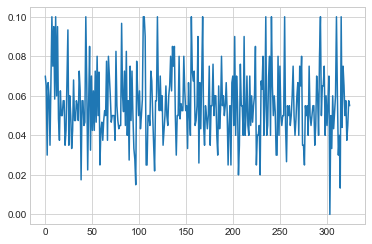

In [18]:
# Mean contribution per user: DAU
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, len(np.unique(userronda_dau['user_id'])), len(np.unique(userronda_dau['user_id'])))
ax.plot(x, mean_contr_user_dau)

In [19]:
mean_contr_user_dau.describe()

count    324.000000
mean       0.055786
std        0.018489
min        0.000000
25%        0.045000
50%        0.052917
75%        0.066667
max        0.100000
dtype: float64

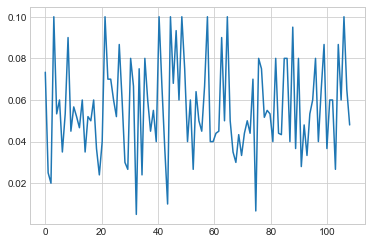

In [20]:
# Mean contribution per user: STREET
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, len(np.unique(userronda_street['user_id'])), len(np.unique(userronda_street['user_id'])))
ax.plot(x, mean_contr_user_street)

In [21]:
mean_contr_user_street.describe()

count    108.000000
mean       0.056506
std        0.022658
min        0.005000
25%        0.040000
50%        0.053333
75%        0.070833
max        0.100000
dtype: float64

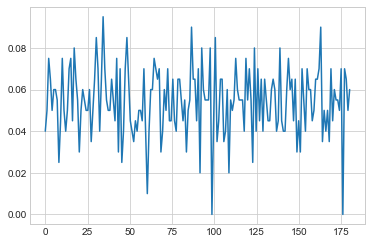

In [22]:
# Mean contribution per user: VIL
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, len(np.unique(userronda_vil['user_id'])), len(np.unique(userronda_vil['user_id'])))
ax.plot(x, mean_contr_user_vil)

In [23]:
mean_contr_user_vil.describe()

count    180.000000
mean       0.054306
std        0.016037
min        0.000000
25%        0.045000
50%        0.055000
75%        0.065000
max        0.095000
dtype: float64

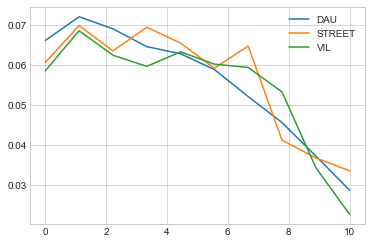

In [24]:
# Mean contribution per round
mean_contr_dau = contr_dau.mean(axis=0)
mean_contr_street= contr_street.mean(axis=0)
mean_contr_vil = contr_vil.mean(axis=0)
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 10)
ax.plot(x, mean_contr_dau,label="DAU")
ax.plot(x, mean_contr_street,label="STREET")
ax.plot(x, mean_contr_vil,label="VIL")
plt.legend()

### Strategies:

In [25]:
### Free Riding
#contr_dau.count(axis=1)
free_rid_dau = (contr_dau == 0).astype(int).sum(axis=1)

In [26]:
#np.sort(free_rid_dau)
#.sort_values(‘column_z’, ascending=False)

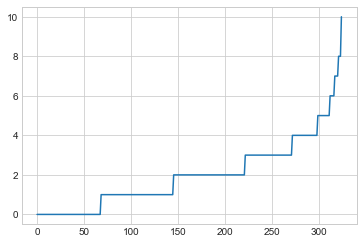

In [27]:
# Free Riding
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, len(np.unique(userronda_dau['user_id'])), len(np.unique(userronda_dau['user_id'])))
ax.plot(x, np.sort(free_rid_dau))

### Principal Component Analysis

In [28]:
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets.samples_generator import make_blobs
from pandas.tools.plotting import parallel_coordinates

#### DAU: 

In [29]:
### Unsupervised clustering (K-MEANS)
### La classe serà el valor del cluster que s'assigna amb un kmeans:
X = contr_dau
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
clustcoef = kmeans.labels_
y = clustcoef

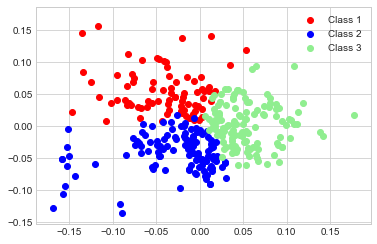

In [30]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(contr_dau))

plt.scatter(transformed[y==0][0], transformed[y==0][1], label='Class 1', c='red')
plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Class 2', c='blue')
plt.scatter(transformed[y==2][0], transformed[y==2][1], label='Class 3', c='lightgreen')
plt.legend()
plt.show()

#### Heterogeneous DAU:

In [31]:
ineq_dau = pd.read_csv("dades/ineq_dau.csv", delimiter=',' , encoding="latin-1")
ineq_contr_dau = contr_dau[contr_dau.index.isin(ineq_dau['user_id'])]

In [32]:
X = ineq_contr_dau
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
clustcoef = kmeans.labels_
y = clustcoef

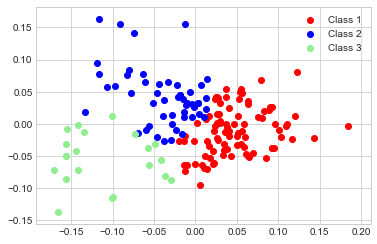

In [33]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(ineq_contr_dau))

plt.scatter(transformed[y==0][0], transformed[y==0][1], label='Class 1', c='red')
plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Class 2', c='blue')
plt.scatter(transformed[y==2][0], transformed[y==2][1], label='Class 3', c='lightgreen')
plt.legend()
plt.show()

In [34]:
X = ineq_contr_dau
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
clustcoef = kmeans.labels_
y = clustcoef

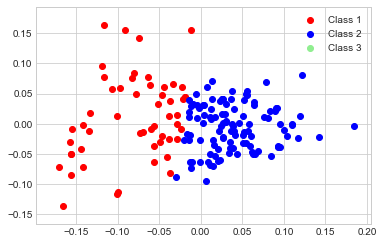

In [35]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(ineq_contr_dau))

plt.scatter(transformed[y==0][0], transformed[y==0][1], label='Class 1', c='red')
plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Class 2', c='blue')
plt.scatter(transformed[y==2][0], transformed[y==2][1], label='Class 3', c='lightgreen')
plt.legend()
plt.show()

#### Homogeneous DAU:

In [36]:
eq_dau = pd.read_csv("dades/eq_dau.csv", delimiter=',' , encoding="latin-1")
eq_contr_dau = contr_dau[contr_dau.index.isin(eq_dau['user_id'])]

In [37]:
X = eq_contr_dau
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
clustcoef = kmeans.labels_
y = clustcoef

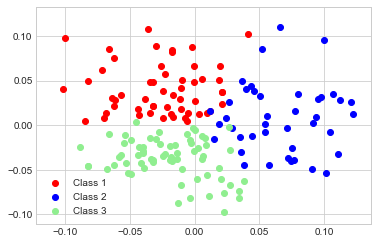

In [38]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(eq_contr_dau))

plt.scatter(transformed[y==0][0], transformed[y==0][1], label='Class 1', c='red')
plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Class 2', c='blue')
plt.scatter(transformed[y==2][0], transformed[y==2][1], label='Class 3', c='lightgreen')
plt.legend()
plt.show()

In [39]:
X = eq_contr_dau
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
clustcoef = kmeans.labels_
y = clustcoef

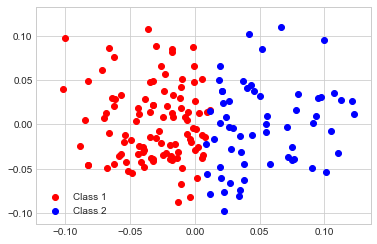

In [40]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(eq_contr_dau))

plt.scatter(transformed[y==0][0], transformed[y==0][1], label='Class 1', c='red')
plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Class 2', c='blue')
#plt.scatter(transformed[y==2][0], transformed[y==2][1], label='Class 3', c='lightgreen')
plt.legend()
plt.show()

#### STREET:

In [41]:
### La classe serà el valor del cluster que s'assigna amb un kmeans:
X = contr_street

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
clustcoef = kmeans.labels_
y = clustcoef

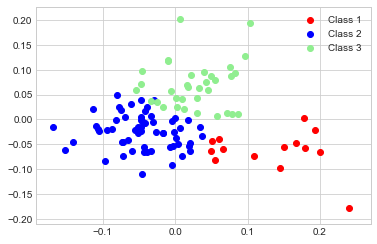

In [42]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(contr_street))

plt.scatter(transformed[y==0][0], transformed[y==0][1], label='Class 1', c='red')
plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Class 2', c='blue')
plt.scatter(transformed[y==2][0], transformed[y==2][1], label='Class 3', c='lightgreen')
plt.legend()
plt.show()

#### VIL:

In [43]:
### La classe serà el valor del cluster que s'assigna amb un kmeans:
X = contr_vil
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
clustcoef = kmeans.labels_
y = clustcoef

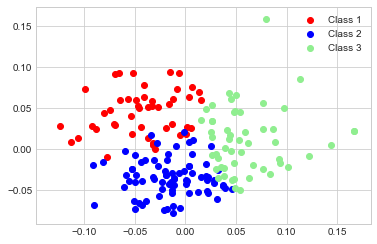

In [44]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(contr_vil))

plt.scatter(transformed[y==0][0], transformed[y==0][1], label='Class 1', c='red')
plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Class 2', c='blue')
plt.scatter(transformed[y==2][0], transformed[y==2][1], label='Class 3', c='lightgreen')
plt.legend()
plt.show()

### Inserting variables to PCA:

#### DAU:

In [45]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(contr_dau))

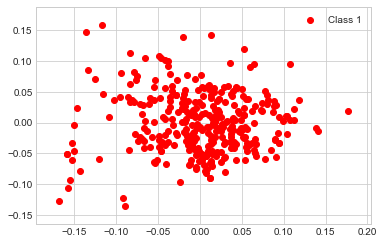

In [46]:
plt.scatter(transformed[0], transformed[1], label='Class 1', c='red')

plt.legend()
plt.show()

In [47]:
## genre
gen = np.asarray(user_dau['genere'])
gen_num = np.where(gen=='d',1,0)

In [48]:
np.unique(user_dau['diners_inicials'])

array([20, 30, 40, 50, 60], dtype=int64)

In [49]:
## diners inicials
din_in = np.asarray(user_dau['diners_inicials'])

In [50]:
for i in range(0,user_dau.shape[0]):
    if din_in[i] == 20:
        din_in[i]=0
    elif din_in[i] == 30:
        din_in[i]=1
    elif din_in[i] == 40:
        din_in[i]=2
    elif din_in[i] == 50:
        din_in[i]=3
    else:
        din_in[i]=4

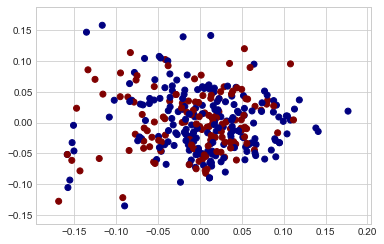

In [51]:
plt.scatter(transformed[0], transformed[1], c=gen_num) # According genre
plt.jet()

plt.show()

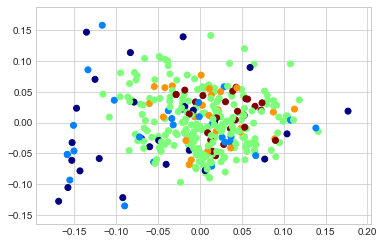

In [52]:
plt.scatter(transformed[0], transformed[1], c=din_in) # According initial budget
plt.jet()

plt.show()

#### Heterogeneous DAU:

In [53]:
ineq_dau = pd.read_csv("dades/ineq_dau.csv", delimiter=',' , encoding="latin-1")
ineq_contr_dau = contr_dau[contr_dau.index.isin(ineq_dau['user_id'])]

In [54]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(ineq_contr_dau))

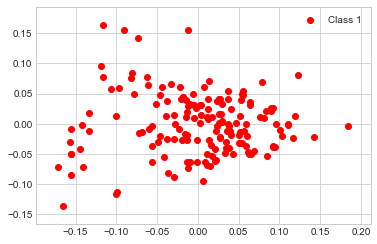

In [55]:
plt.scatter(transformed[0], transformed[1], label='Class 1', c='red')

plt.legend()
plt.show()

#### Homogeneous DAU: 

In [56]:
eq_dau = pd.read_csv("dades/eq_dau.csv", delimiter=',' , encoding="latin-1")
eq_contr_dau = contr_dau[contr_dau.index.isin(eq_dau['user_id'])]

In [57]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(eq_contr_dau))

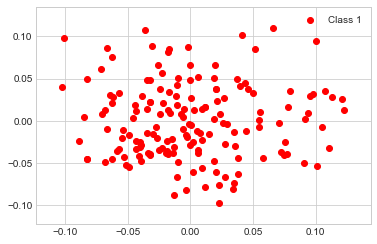

In [58]:
plt.scatter(transformed[0], transformed[1], label='Class 1', c='red')

plt.legend()
plt.show()

#### STREET:

In [59]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(contr_street))

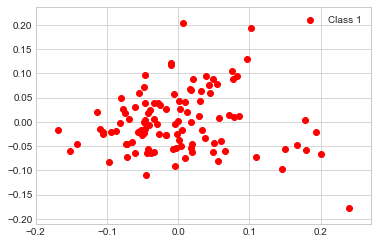

In [60]:
plt.scatter(transformed[0], transformed[1], label='Class 1', c='red')

plt.legend()
plt.show()

In [61]:
## genre
#gen = np.asarray(user_street[]['genere'])

gen = np.asarray(user_street.loc[user_street['user_id'].isin(np.unique(userronda_street['user_id']))]['genere'])
gen_num = np.where(gen=='d',1,0)

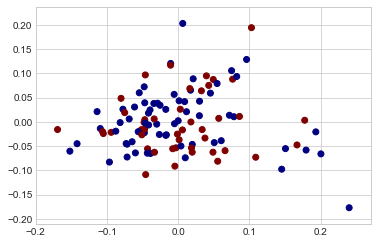

In [62]:
plt.scatter(transformed[0], transformed[1], c=gen_num) # According genre
plt.jet()

plt.show()

#### VIL:

In [63]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(contr_vil))

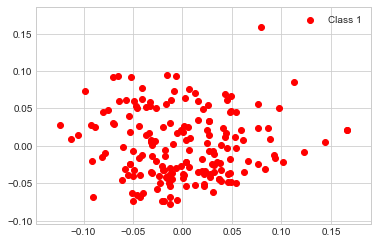

In [64]:
plt.scatter(transformed[0], transformed[1], label='Class 1', c='red')

plt.legend()
plt.show()

In [65]:
## genre
#gen = np.asarray(user_vil['genere'])
gen = np.asarray(user_vil.loc[user_vil['user_id'].isin(np.unique(userronda_vil['user_id']))]['genere'])

gen_num = np.where(gen=='F',1,0)

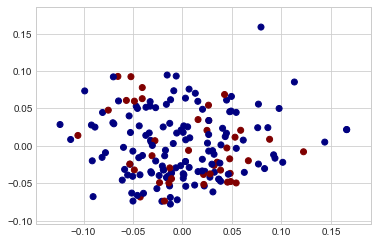

In [66]:
plt.scatter(transformed[0], transformed[1], c=gen_num) # According genre
plt.jet()

plt.show()

### Space partition

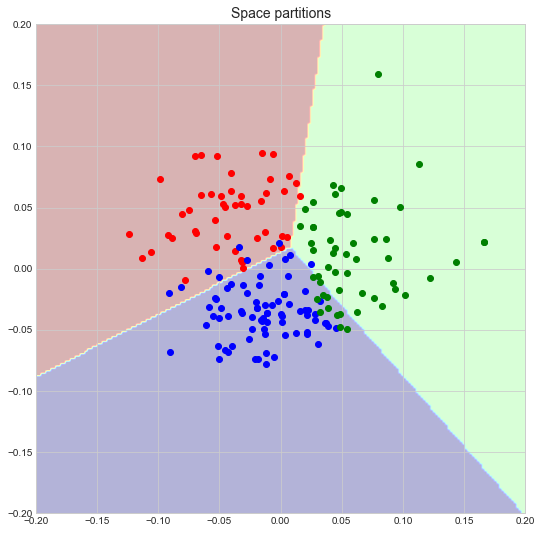

In [67]:
X = np.asarray(transformed)

from sklearn import cluster

K=3
clf = cluster.KMeans(init='random', n_clusters=K)
clf.fit(X)

plt.scatter(X[(y==0).ravel(),0],X[(y==0).ravel(),1],color='r')
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='b')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='g')

x = np.linspace(-0.20,0.20,200)
XX,YY = np.meshgrid(x,x)
sz=XX.shape
data=np.c_[XX.ravel(),YY.ravel()]

Z=clf.predict(data)
plt.imshow(Z.reshape(sz), interpolation='bilinear', origin='lower', extent=(-0.2,0.2,-0.2,0.2),alpha=0.3, vmin=0, vmax=K-1)
plt.title('Space partitions', size=14)
fig = plt.gcf()
fig.set_size_inches((9,9))

In [68]:
import numpy as np
from scipy.spatial import distance

def gaussian_kernel(xa,xb,gamma):
    d = distance.cdist(xa,xb,metric='euclidean')
    return np.exp(-d*gamma)

gamma = 2.
K = gaussian_kernel(X,X,gamma)
np.all(np.linalg.eigvals(K) > 0)

True

In [69]:
def train_svm(X,y,gamma,C,eta,n_iters):
    mom = 0.
    alpha = np.zeros((X.shape[0],1))
    K = gaussian_kernel(X,X,gamma)
    for i in range(n_iters):
        idx = np.random.randint(X.shape[0])
        xi,yi = X[idx,:],y[idx]
        if yi*np.dot(gaussian_kernel(xi[np.newaxis,:],X,gamma),alpha)<=1.:
            g = 2*np.dot(K,alpha) - C*yi*gaussian_kernel(xi[np.newaxis,:],X,gamma).T
        else:
            g = 2*np.dot(K,alpha) 
            
        mom = 0.9*mom - g
        alpha = alpha + eta*mom
    return alpha

def test_svm(xtest,X,alpha,gamma):
    return np.dot(gaussian_kernel(xtest,X,gamma),alpha)

In [70]:
gamma = 1e1
C = 1e-1
eta = 0.001

alpha = train_svm(X,y,gamma,C,eta,10000)

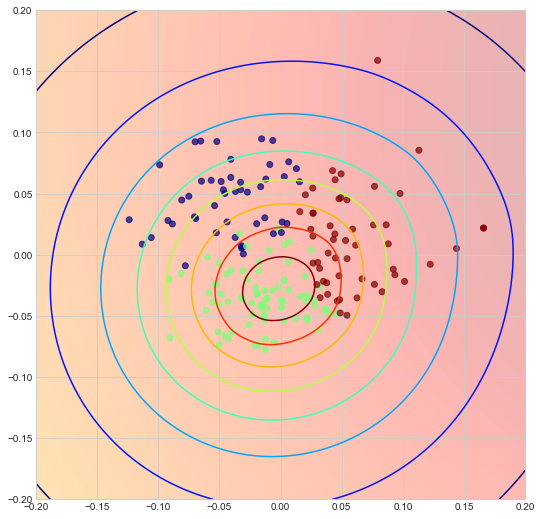

In [71]:
xx,yy = np.meshgrid(np.linspace(-0.2,0.2,200),np.linspace(-0.2,0.2,200))
viz=np.c_[xx.ravel(),yy.ravel()]

z = test_svm(viz,X,alpha,gamma)

plt.scatter(X[:, 0], X[:, 1], c=y,   alpha=0.7)
plt.gca().set_xlim([-0.2,0.2])
plt.gca().set_ylim([-0.2,0.2])
plt.imshow(z.reshape((200,200)), interpolation='bilinear', origin='lower', extent=(-2,3,-2,3),alpha=0.3)
plt.contour(xx,yy,z.reshape((200,200)))

plt.gcf().set_size_inches((9,9))

In [72]:
#from sklearn.model_selection import KFold 
#kf = KFold(n_splits=5, shuffle=True, random_state=None) 
#X = contr_round
#X = np.asarray(X)
#for train_index, test_index in kf.split(X):
#      #print("Train:", train_index, "Validation:",test_index)
#        
#        X_train, X_test = X[train_index], X[test_index] 
#        y_train, y_test = y[train_index], y[test_index]

In [73]:
#from sklearn.datasets import make_regression
#from sklearn.multioutput import MultiOutputRegressor
#from sklearn.ensemble import GradientBoostingRegressor
#X_train, y_train = make_regression(n_samples=10, n_targets=3, random_state=1)
#MultiOutputRegressor(GradientBoostingRegressor(random_state=0)).fit(X_train, y_train).predict(X_train)

### Classifiers: 

In [64]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [65]:
X = contr_dau
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
clustcoef = kmeans.labels_
y = clustcoef
X = np.asarray(contr_dau)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [66]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
kfold = model_selection.KFold(n_splits=5, random_state=7)
logreg = LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg')
scoring = 'accuracy'
results = model_selection.cross_val_score(logreg, X_train, y_train, cv=kfold, scoring=scoring)
print("5-fold cross validation average accuracy: %.3f" % (results.mean()))
logreg.fit(X_train, y_train)
print('Accuracy of LogisticRegression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of LogisticRegression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

5-fold cross validation average accuracy: 0.695
Accuracy of LogisticRegression classifier on training set: 0.76
Accuracy of LogisticRegression classifier on test set: 0.74


In [67]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(tree, X_train, y_train, cv=kfold, scoring=scoring)
print("5-fold cross validation average accuracy: %.3f" % (results.mean()))
tree.fit(X_train, y_train)
print('Accuracy of DecisionTree classifier on training set: {:.2f}'
     .format(tree.score(X_train, y_train)))
print('Accuracy of DecisionTree classifier on test set: {:.2f}'
     .format(tree.score(X_test, y_test)))

5-fold cross validation average accuracy: 0.707
Accuracy of DecisionTree classifier on training set: 1.00
Accuracy of DecisionTree classifier on test set: 0.77


In [68]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(knn, X_train, y_train, cv=kfold, scoring=scoring)
print("5-fold cross validation average accuracy: %.3f" % (results.mean()))
knn.fit(X_train, y_train)
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

5-fold cross validation average accuracy: 0.880
Accuracy of KNN classifier on training set: 0.94
Accuracy of KNN classifier on test set: 0.89


In [69]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
results = model_selection.cross_val_score(lda, X_train, y_train, cv=kfold, scoring=scoring)
print("5-fold cross validation average accuracy: %.3f" % (results.mean()))
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.3f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.3f}'
     .format(lda.score(X_test, y_test)))

5-fold cross validation average accuracy: 0.907
Accuracy of LDA classifier on training set: 0.942
Accuracy of LDA classifier on test set: 0.938


In [70]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
results = model_selection.cross_val_score(gnb, X_train, y_train, cv=kfold, scoring=scoring)
print("5-fold cross validation average accuracy: %.3f" % (results.mean()))
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.3f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.3f}'
     .format(gnb.score(X_test, y_test)))

5-fold cross validation average accuracy: 0.880
Accuracy of GNB classifier on training set: 0.934
Accuracy of GNB classifier on test set: 0.923


In [65]:
from sklearn.svm import SVC
svm = SVC()
results = model_selection.cross_val_score(svm, X_train, y_train, cv=kfold, scoring=scoring)
print("5-fold cross validation average accuracy: %.3f" % (results.mean()))

svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.3f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.3f}'
     .format(svm.score(X_test, y_test)))

5-fold cross validation average accuracy: 0.313
Accuracy of SVM classifier on training set: 0.379
Accuracy of SVM classifier on test set: 0.420


In [66]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = lda.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[19  0  2]
 [ 0 25  1]
 [ 0  3 31]]
             precision    recall  f1-score   support

          0       1.00      0.90      0.95        21
          1       0.89      0.96      0.93        26
          2       0.91      0.91      0.91        34

avg / total       0.93      0.93      0.93        81



### Linear Discriminant Analysis

The best classifier according the Kfold method for this data is the LDA so lets review what we would get. 

#### DAU:

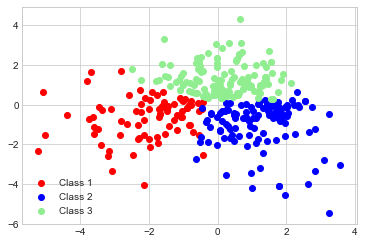

In [170]:
X = contr_dau
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
clustcoef = kmeans.labels_
y = clustcoef


lda = LDA(n_components=2) #2-dimensional LDA
lda_transformed = pd.DataFrame(lda.fit_transform(X, y))

# Plot all three series
plt.scatter(lda_transformed[y==0][0], lda_transformed[y==0][1], label='Class 1', c='red')
plt.scatter(lda_transformed[y==1][0], lda_transformed[y==1][1], label='Class 2', c='blue')
plt.scatter(lda_transformed[y==2][0], lda_transformed[y==2][1], label='Class 3', c='lightgreen')

# Display legend and show plot
plt.legend(loc=3)
plt.show()

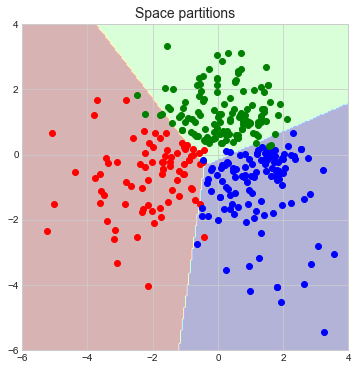

In [171]:
X = np.asarray(lda_transformed)

from sklearn import cluster

K=3
clf = cluster.KMeans(init='random', n_clusters=K)
clf.fit(X)

plt.scatter(X[(y==0).ravel(),0],X[(y==0).ravel(),1],color='r')
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='b')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='g')

x = np.linspace(-6,4,200)
XX,YY = np.meshgrid(x,x)
sz=XX.shape
data=np.c_[XX.ravel(),YY.ravel()]

Z=clf.predict(data)
plt.imshow(Z.reshape(sz), interpolation='bilinear', origin='lower', extent=(-6,4,-6,4),alpha=0.3, vmin=0, vmax=K-1)
plt.title('Space partitions', size=14)
fig = plt.gcf()
fig.set_size_inches((6,6))

#### Heterogeneous DAU:

In [72]:
y

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1])

In [76]:
X = ineq_contr_dau
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
clustcoef = kmeans.labels_
y = clustcoef


lda = LDA(solver = 'svd',n_components=2) #2-dimensional LDA
lda_transformed = pd.DataFrame(lda.fit_transform(X, y))

In [77]:
# Plot all three series
plt.scatter(lda_transformed[y==0][0], lda_transformed[y==0][1], label='Class 1', c='red')
plt.scatter(lda_transformed[y==1][0], lda_transformed[y==1][1], label='Class 2', c='blue')
#plt.scatter(lda_transformed[y==2][0], lda_transformed[y==2][1], label='Class 3', c='lightgreen')

# Display legend and show plot
plt.legend(loc=3)
plt.show()

KeyError: 1

In [ ]:
X = ineq_contr_dau
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
clustcoef = kmeans.labels_
y = clustcoef

lda = LDA(n_components=2) #2-dimensional LDA
lda_transformed = pd.DataFrame(lda.fit_transform(X, y))

# Plot all three series
plt.scatter(lda_transformed[y==0][0], lda_transformed[y==0][1], label='Class 1', c='red')
plt.scatter(lda_transformed[y==1][0], lda_transformed[y==1][1], label='Class 2', c='blue')
#plt.scatter(lda_transformed[y==2][0], lda_transformed[y==2][1], label='Class 3', c='lightgreen')

# Display legend and show plot
plt.legend(loc=3)
plt.show()

#### Homogeneous DAU:

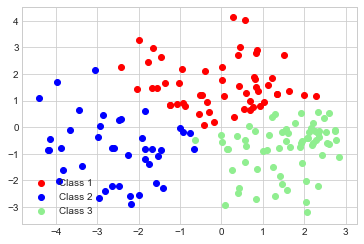

In [182]:
X = eq_contr_dau
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
clustcoef = kmeans.labels_
y = clustcoef


lda = LDA(n_components=2) #2-dimensional LDA
lda_transformed = pd.DataFrame(lda.fit_transform(X, y))

# Plot all three series
plt.scatter(lda_transformed[y==0][0], lda_transformed[y==0][1], label='Class 1', c='red')
plt.scatter(lda_transformed[y==1][0], lda_transformed[y==1][1], label='Class 2', c='blue')
plt.scatter(lda_transformed[y==2][0], lda_transformed[y==2][1], label='Class 3', c='lightgreen')

# Display legend and show plot
plt.legend(loc=3)
plt.show()

#### STREET:

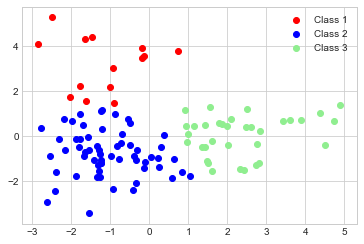

In [69]:
X = contr_street
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
clustcoef = kmeans.labels_
y = clustcoef


lda = LDA(n_components=2) #2-dimensional LDA
lda_transformed = pd.DataFrame(lda.fit_transform(X, y))

# Plot all three series
plt.scatter(lda_transformed[y==0][0], lda_transformed[y==0][1], label='Class 1', c='red')
plt.scatter(lda_transformed[y==1][0], lda_transformed[y==1][1], label='Class 2', c='blue')
plt.scatter(lda_transformed[y==2][0], lda_transformed[y==2][1], label='Class 3', c='lightgreen')

# Display legend and show plot
plt.legend(loc=1)
plt.show()

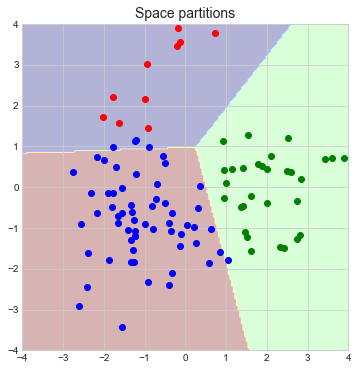

In [70]:
X = np.asarray(lda_transformed)

from sklearn import cluster

K=3
clf = cluster.KMeans(init='random', n_clusters=K)
clf.fit(X)

plt.scatter(X[(y==0).ravel(),0],X[(y==0).ravel(),1],color='r')
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='b')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='g')

x = np.linspace(-4,4,200)
XX,YY = np.meshgrid(x,x)
sz=XX.shape
data=np.c_[XX.ravel(),YY.ravel()]

Z=clf.predict(data)
plt.imshow(Z.reshape(sz), interpolation='bilinear', origin='lower', extent=(-4,4,-4,4),alpha=0.3, vmin=0, vmax=K-1)
plt.title('Space partitions', size=14)
fig = plt.gcf()
fig.set_size_inches((6,6))

#### VIL:

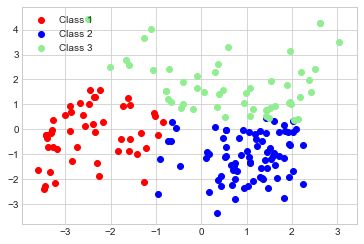

In [71]:
X = contr_vil
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
clustcoef = kmeans.labels_
y = clustcoef


lda = LDA(n_components=2) #2-dimensional LDA
lda_transformed = pd.DataFrame(lda.fit_transform(X, y))

# Plot all three series
plt.scatter(lda_transformed[y==0][0], lda_transformed[y==0][1], label='Class 1', c='red')
plt.scatter(lda_transformed[y==1][0], lda_transformed[y==1][1], label='Class 2', c='blue')
plt.scatter(lda_transformed[y==2][0], lda_transformed[y==2][1], label='Class 3', c='lightgreen')

# Display legend and show plot
plt.legend(loc=2)
plt.show()

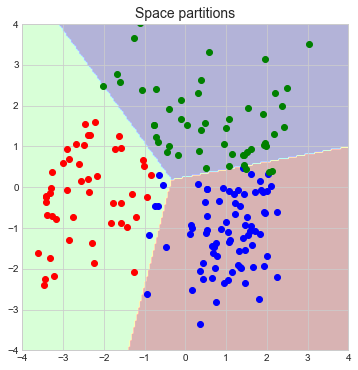

In [72]:
X = np.asarray(lda_transformed)

from sklearn import cluster

K=3
clf = cluster.KMeans(init='random', n_clusters=K)
clf.fit(X)

plt.scatter(X[(y==0).ravel(),0],X[(y==0).ravel(),1],color='r')
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='b')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='g')

x = np.linspace(-4,4,200)
XX,YY = np.meshgrid(x,x)
sz=XX.shape
data=np.c_[XX.ravel(),YY.ravel()]

Z=clf.predict(data)
plt.imshow(Z.reshape(sz), interpolation='bilinear', origin='lower', extent=(-4,4,-4,4),alpha=0.3, vmin=0, vmax=K-1)
plt.title('Space partitions', size=14)
fig = plt.gcf()
fig.set_size_inches((6,6))

## Identifying groups: 
### DAU

In [183]:
### Unsupervised clustering (K-MEANS)
### La classe serà el valor del cluster que s'assigna amb un kmeans:
X = contr_dau
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
clustcoef = kmeans.labels_
y = clustcoef

clust1 = X.iloc[y == 0]
clust2 = X.iloc[y == 1]
clust3 = X.iloc[y == 2]

### 1: General Statistics per cluster

In [184]:
mean_contr_user_clust1 = clust1.mean(axis=1)
mean_contr_user_clust1.describe()

count    81.00000
mean      0.07071
std       0.01343
min       0.04500
25%       0.06000
50%       0.06750
75%       0.08000
max       0.10000
dtype: float64

In [185]:
mean_contr_user_clust2 = clust2.mean(axis=1)
mean_contr_user_clust2.describe()

count    117.000000
mean       0.063115
std        0.014939
min        0.045000
25%        0.052500
50%        0.060000
75%        0.070000
max        0.100000
dtype: float64

In [186]:
mean_contr_user_clust3 = clust3.mean(axis=1)
mean_contr_user_clust3.describe()

count    126.000000
mean       0.039386
std        0.009750
min        0.000000
25%        0.035000
50%        0.040000
75%        0.046667
max        0.055000
dtype: float64

### 2: Initial budget per cluster

In [187]:
users_clust1 = list(clust1.index)
users_clust2 = list(clust2.index)
users_clust3 = list(clust3.index)

In [188]:
user_dau = pd.read_csv("dades/dades_csv/climatedau/game_user.csv", delimiter=',' , encoding="latin-1")
user_dau.drop(user_dau.index[3], inplace=True)
din_in_clust1 = user_dau[user_dau['user_id'].isin(users_clust1)]['diners_inicials']
din_in_clust2 = user_dau[user_dau['user_id'].isin(users_clust2)]['diners_inicials']
din_in_clust3 = user_dau[user_dau['user_id'].isin(users_clust3)]['diners_inicials']

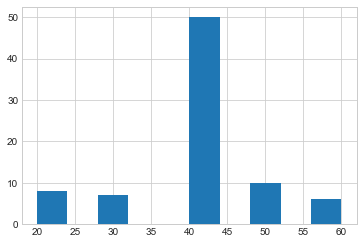

In [189]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
x = np.linspace(1, len(din_in_clust1), len(din_in_clust1))
#ax.set_title('Huber function')
#ax.set_xlabel('$u$')
#ax.set_ylabel(r'$\rho(u)$')
y = din_in_clust1
#plt.scatter(x, y, c="r")
plt.hist(y)
#plt.axhline(c="g")
#plt.axvline(c="g")
plt.show()

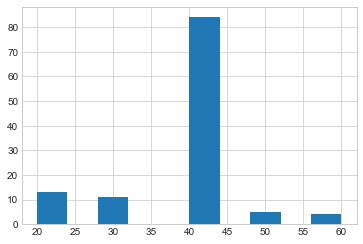

In [190]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
x = np.linspace(1, len(din_in_clust2), len(din_in_clust2))
#ax.set_title('Huber function')
#ax.set_xlabel('$u$')
#ax.set_ylabel(r'$\rho(u)$')
y = din_in_clust2
#plt.scatter(x, y, c="r")
plt.hist(y)
#plt.axhline(c="g")
#plt.axvline(c="g")
plt.show()

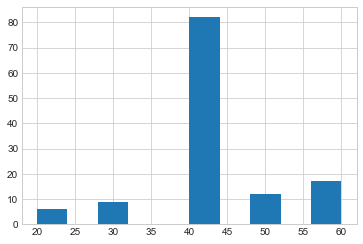

In [191]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
x = np.linspace(1, len(din_in_clust3), len(din_in_clust3))
#ax.set_title('Huber function')
#ax.set_xlabel('$u$')
#ax.set_ylabel(r'$\rho(u)$')
y = din_in_clust3
#plt.scatter(x, y, c="r")
plt.hist(y)
#plt.axhline(c="g")
#plt.axvline(c="g")
plt.show()

In [192]:
### T-Test to compare mean values:
from scipy import stats
stats.ttest_ind(din_in_clust1,din_in_clust2)
## As p-value < 0.1 --> Reject H0 of equal averages.

Ttest_indResult(statistic=1.5142044491221778, pvalue=0.13158490448678825)

In [194]:
### T-Test to compare mean values:
from scipy import stats
stats.ttest_ind(din_in_clust1,din_in_clust3)
## As p-value < 0.1 --> Reject H0 of equal averages.

Ttest_indResult(statistic=-1.5748250161870148, pvalue=0.1168388277989728)

In [193]:
### T-Test to compare mean values:
from scipy import stats
stats.ttest_ind(din_in_clust2,din_in_clust3)
## As p-value < 0.1 --> Reject H0 of equal averages.

Ttest_indResult(statistic=-3.5670975374776734, pvalue=0.00043533801912292634)

Els t-test m'estan dient que no son mostres estadísticament diferents. 

### STREET

In [82]:
### Unsupervised clustering (K-MEANS)
### La classe serà el valor del cluster que s'assigna amb un kmeans:
X = contr_street
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
clustcoef = kmeans.labels_
y = clustcoef

clust1 = X.iloc[y == 0]
clust2 = X.iloc[y == 1]
clust3 = X.iloc[y == 2]

### 1: General Statistics per cluster

In [83]:
mean_contr_user_clust1 = clust1.mean(axis=1)
mean_contr_user_clust1.describe()

count    14.000000
mean      0.082976
std       0.016489
min       0.060000
25%       0.066667
50%       0.085000
75%       0.100000
max       0.100000
dtype: float64

In [84]:
mean_contr_user_clust2 = clust2.mean(axis=1)
mean_contr_user_clust2.describe()

count    60.000000
mean      0.040533
std       0.012805
min       0.005000
25%       0.034583
50%       0.041667
75%       0.050000
max       0.065000
dtype: float64

In [85]:
mean_contr_user_clust3 = clust3.mean(axis=1)
mean_contr_user_clust3.describe()

count    34.000000
mean      0.073794
std       0.013974
min       0.051667
25%       0.060000
50%       0.074167
75%       0.080000
max       0.100000
dtype: float64

### 2: Initial budget per cluster

In [86]:
users_clust1 = list(clust1.index)
users_clust2 = list(clust2.index)
users_clust3 = list(clust3.index)

In [87]:
din_in_clust1 = user_street[user_street['user_id'].isin(users_clust1)]['diners_inicials']
din_in_clust2 = user_street[user_street['user_id'].isin(users_clust2)]['diners_inicials']
din_in_clust3 = user_street[user_street['user_id'].isin(users_clust3)]['diners_inicials']

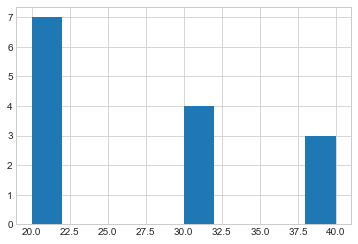

In [88]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
x = np.linspace(1, len(din_in_clust1), len(din_in_clust1))
#ax.set_title('Huber function')
#ax.set_xlabel('$u$')
#ax.set_ylabel(r'$\rho(u)$')
y = din_in_clust1
#plt.scatter(x, y, c="r")
plt.hist(y)
#plt.axhline(c="g")
#plt.axvline(c="g")
plt.show()

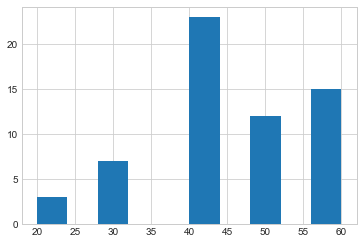

In [89]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
x = np.linspace(1, len(din_in_clust2), len(din_in_clust2))
#ax.set_title('Huber function')
#ax.set_xlabel('$u$')
#ax.set_ylabel(r'$\rho(u)$')
y = din_in_clust2
#plt.scatter(x, y, c="r")
plt.hist(y)
#plt.axhline(c="g")
#plt.axvline(c="g")
plt.show()

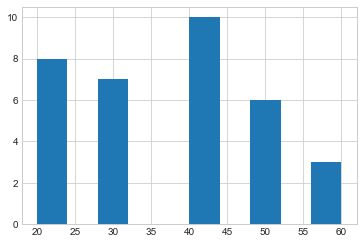

In [90]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
x = np.linspace(1, len(din_in_clust3), len(din_in_clust3))
#ax.set_title('Huber function')
#ax.set_xlabel('$u$')
#ax.set_ylabel(r'$\rho(u)$')
y = din_in_clust3
#plt.scatter(x, y, c="r")
plt.hist(y)
#plt.axhline(c="g")
#plt.axvline(c="g")
plt.show()

In [91]:
### T-Test to compare mean values:
from scipy import stats
stats.ttest_ind(din_in_clust1,din_in_clust2)
## As p-value < 0.1 --> Reject H0 of equal averages.

Ttest_indResult(statistic=-5.4586279632790582, pvalue=6.4701837785756842e-07)

In [92]:
### T-Test to compare mean values:
from scipy import stats
stats.ttest_ind(din_in_clust2,din_in_clust3)
## As p-value < 0.1 --> Reject H0 of equal averages.

Ttest_indResult(statistic=3.1569312741422118, pvalue=0.0021561385602864398)

In [93]:
### T-Test to compare mean values:
from scipy import stats
stats.ttest_ind(din_in_clust1,din_in_clust3)
## As p-value < 0.1 --> Reject H0 of equal averages.

Ttest_indResult(statistic=-2.6036471852092404, pvalue=0.012376486067399793)

### VIL:

In [94]:
### Unsupervised clustering (K-MEANS)
### La classe serà el valor del cluster que s'assigna amb un kmeans:
X = contr_vil
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
clustcoef = kmeans.labels_
y = clustcoef

clust1 = X.iloc[y == 0]
clust2 = X.iloc[y == 1]
clust3 = X.iloc[y == 2]

### 1: General Statistics

In [95]:
mean_contr_user_clust1 = clust1.mean(axis=1)
mean_contr_user_clust1.describe()

count    48.000000
mean      0.068229
std       0.010793
min       0.050000
25%       0.060000
50%       0.070000
75%       0.075000
max       0.095000
dtype: float64

In [96]:
mean_contr_user_clust2 = clust2.mean(axis=1)
mean_contr_user_clust2.describe()

count    79.000000
mean      0.057595
std       0.009834
min       0.040000
25%       0.050000
50%       0.055000
75%       0.065000
max       0.085000
dtype: float64

In [97]:
mean_contr_user_clust3 = clust3.mean(axis=1)
mean_contr_user_clust3.describe()

count    53.000000
mean      0.036792
std       0.011270
min       0.000000
25%       0.030000
50%       0.040000
75%       0.045000
max       0.050000
dtype: float64

In [217]:
### T-Test to compare mean values:
from scipy import stats
stats.ttest_ind(mean_contr_user_clust1,mean_contr_user_clust2)
## As p-value < 0.1 --> Reject H0 of equal averages.

Ttest_indResult(statistic=-14.116702702376772, pvalue=7.452457027436837e-25)

In [218]:
### T-Test to compare mean values:
from scipy import stats
stats.ttest_ind(mean_contr_user_clust1,mean_contr_user_clust3)
## As p-value < 0.1 --> Reject H0 of equal averages.

Ttest_indResult(statistic=-10.34526380105876, pvalue=2.782778278293882e-18)

In [219]:
### T-Test to compare mean values:
from scipy import stats
stats.ttest_ind(mean_contr_user_clust2,mean_contr_user_clust3)
## As p-value < 0.1 --> Reject H0 of equal averages.

Ttest_indResult(statistic=5.3964863284997007, pvalue=4.1748857932431086e-07)

### Heterogeneous DAU: 

In [98]:
ineq_dau = pd.read_csv("dades/ineq_dau.csv", delimiter=',' , encoding="latin-1")
ineq_contr_dau = contr_dau[contr_dau.index.isin(ineq_dau['user_id'])]

In [99]:
### Unsupervised clustering (K-MEANS)
# El nombre òptim de clusters amb k-means és 2 per les contribucions dels casos amb desigualtat

X = ineq_contr_dau
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
clustcoef = kmeans.labels_
y = clustcoef

clust1 = X.iloc[y == 0]
clust2 = X.iloc[y == 1]
#clust3 = X.iloc[y == 2]

### 1: General Statistics per cluster

In [100]:
mean_contr_user_clust1 = clust1.mean(axis=1)
mean_contr_user_clust1.describe()

count    53.000000
mean      0.082522
std       0.013669
min       0.060000
25%       0.070000
50%       0.080000
75%       0.100000
max       0.100000
dtype: float64

In [101]:
mean_contr_user_clust2 = clust2.mean(axis=1)
mean_contr_user_clust2.describe()

count    109.000000
mean       0.045261
std        0.012420
min        0.000000
25%        0.040000
50%        0.046667
75%        0.055000
max        0.065000
dtype: float64

### 2: Initial budget per cluster

In [102]:
users_clust1 = list(clust1.index)
users_clust2 = list(clust2.index)
#users_clust3 = list(clust3.index)

In [103]:
#user_dau = pd.read_csv("dades/dades_csv/climatedau/game_user.csv", delimiter=',' , encoding="latin-1")
#user_dau.drop(user_dau.index[3], inplace=True)
din_in_clust1 = user_dau[user_dau['user_id'].isin(users_clust1)]['diners_inicials']
din_in_clust2 = user_dau[user_dau['user_id'].isin(users_clust2)]['diners_inicials']
#din_in_clust3 = user_dau[user_dau['user_id'].isin(users_clust3)]['diners_inicials']

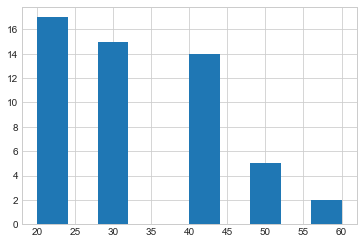

In [104]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
x = np.linspace(1, len(din_in_clust1), len(din_in_clust1))
#ax.set_title('Huber function')
#ax.set_xlabel('$u$')
#ax.set_ylabel(r'$\rho(u)$')
y = din_in_clust1
#plt.scatter(x, y, c="r")
plt.hist(y)
#plt.axhline(c="g")
#plt.axvline(c="g")
plt.show()

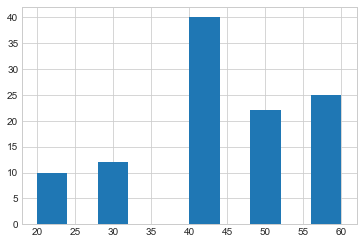

In [105]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
x = np.linspace(1, len(din_in_clust2), len(din_in_clust2))
#ax.set_title('Huber function')
#ax.set_xlabel('$u$')
#ax.set_ylabel(r'$\rho(u)$')
y = din_in_clust2
#plt.scatter(x, y, c="r")
plt.hist(y)
#plt.axhline(c="g")
#plt.axvline(c="g")
plt.show()

In [106]:
### T-Test to compare mean values:
from scipy import stats
stats.ttest_ind(din_in_clust1,din_in_clust2)
## As p-value < 0.1 --> Reject H0 of equal averages.

Ttest_indResult(statistic=-5.6468634337114052, pvalue=7.2829487544687928e-08)

### Homogeneous DAU:

In [209]:
eq_dau = pd.read_csv("dades/eq_dau.csv", delimiter=',' , encoding="latin-1")
eq_contr_dau = contr_dau[contr_dau.index.isin(eq_dau['user_id'])]

In [108]:
eq_contr_dau.to_csv('dades/eq_contr_dau.csv' ,sep=',', index=False)

In [210]:
### Unsupervised clustering (K-MEANS)
# El nombre òptim de clusters amb k-means és 4 per les contribucions dels casos amb desigualtat

X = eq_contr_dau
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
clustcoef = kmeans.labels_
y = clustcoef

clust1 = X.iloc[y == 0]
clust2 = X.iloc[y == 1]
clust3 = X.iloc[y == 2]
#clust4 = X.iloc[y == 3]

### 1: General Statistics per cluster

In [211]:
mean_contr_user_clust1 = clust1.mean(axis=1)
mean_contr_user_clust1.describe()

count    54.000000
mean      0.039907
std       0.008687
min       0.015000
25%       0.035000
50%       0.040000
75%       0.046875
max       0.052500
dtype: float64

In [212]:
mean_contr_user_clust2 = clust2.mean(axis=1)
mean_contr_user_clust2.describe()

count    41.000000
mean      0.067805
std       0.010565
min       0.045000
25%       0.060000
50%       0.067500
75%       0.075000
max       0.085000
dtype: float64

In [213]:
mean_contr_user_clust3 = clust3.mean(axis=1)
mean_contr_user_clust3.describe()

count    67.000000
mean      0.057201
std       0.009490
min       0.040000
25%       0.050000
50%       0.055000
75%       0.062500
max       0.080000
dtype: float64

In [113]:
mean_contr_user_clust4 = clust4.mean(axis=1)
mean_contr_user_clust4.describe()

count    41.000000
mean      0.063537
std       0.009420
min       0.050000
25%       0.055000
50%       0.062500
75%       0.070000
max       0.080000
dtype: float64

In [214]:
from scipy import stats
stats.ttest_ind(mean_contr_user_clust1,mean_contr_user_clust2)

Ttest_indResult(statistic=-14.116702702376772, pvalue=7.452457027436837e-25)

In [215]:
stats.ttest_ind(mean_contr_user_clust1,mean_contr_user_clust3)

Ttest_indResult(statistic=-10.34526380105876, pvalue=2.782778278293882e-18)

In [216]:
stats.ttest_ind(mean_contr_user_clust2,mean_contr_user_clust3)

Ttest_indResult(statistic=5.3964863284997007, pvalue=4.1748857932431086e-07)

In [116]:
stats.ttest_ind(mean_contr_user_clust1,mean_contr_user_clust4)

Ttest_indResult(statistic=-6.2857747427864936, pvalue=1.4950016552452186e-08)

In [118]:
stats.ttest_ind(mean_contr_user_clust2,mean_contr_user_clust4)

Ttest_indResult(statistic=-12.566817532578179, pvalue=5.4152929097251895e-21)

In [119]:
stats.ttest_ind(mean_contr_user_clust3,mean_contr_user_clust4)#Només en la relació entre el cluster 3 i 4 no hi ha mitges diferents

Ttest_indResult(statistic=1.0850651180721924, pvalue=0.28151263529584758)

### Other clustering methods: 

### Dendogram - Hierarchical Clustering

In [74]:
# needed imports# neede 
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

#### DAU:

In [75]:
X = np.asarray(contr_dau)
# generate the linkage matrix
Z = linkage(X, 'ward')

In [145]:
c, coph_dists = cophenet(Z, pdist(X))
c

0.30483957448028776

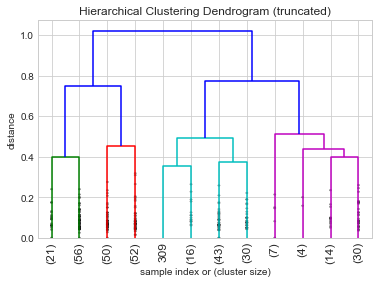

In [146]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

#### STREET

In [156]:
X = np.asarray(contr_street)
# generate the linkage matrix
Z = linkage(X, 'ward')


In [157]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(X))
c

0.46278268935359179

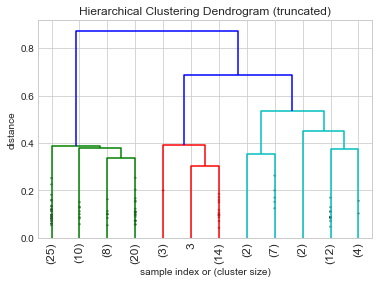

In [158]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [159]:
from scipy.cluster.hierarchy import fcluster
max_d = 0.6
clusters = fcluster(Z, max_d, criterion='distance')
y = clusters

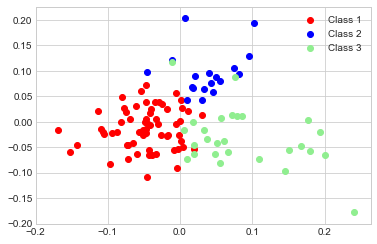

In [160]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(contr_street))

plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Class 1', c='red')
plt.scatter(transformed[y==2][0], transformed[y==2][1], label='Class 2', c='blue')
plt.scatter(transformed[y==3][0], transformed[y==3][1], label='Class 3', c='lightgreen')
plt.legend()
plt.show()

In [161]:
from scipy.cluster.hierarchy import fcluster
max_d = 0.8
clusters = fcluster(Z, max_d, criterion='distance')
y = clusters

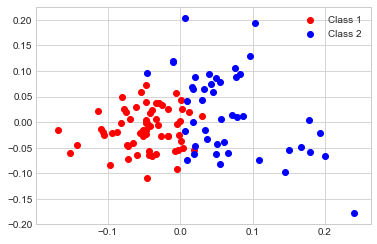

In [162]:
transformed = pd.DataFrame(pca.fit_transform(contr_street))

plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Class 1', c='red')
plt.scatter(transformed[y==2][0], transformed[y==2][1], label='Class 2', c='blue')
#plt.scatter(transformed[y==3][0], transformed[y==3][1], label='Class 3', c='lightgreen')
plt.legend()
plt.show()

#### Heterogènies DAU

In [97]:
ineq_dau = pd.read_csv("dades/ineq_dau.csv", delimiter=',' , encoding="latin-1")
ineq_contr_dau = contr_dau[contr_dau.index.isin(ineq_dau['user_id'])]

In [98]:
X = np.asarray(ineq_contr_dau)
# generate the linkage matrix
Z = linkage(X, 'ward')

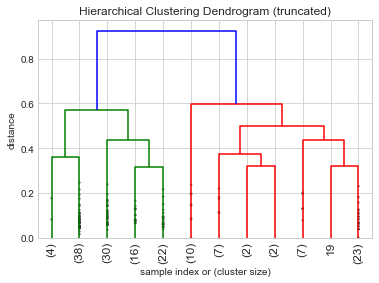

In [99]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [100]:
from scipy.cluster.hierarchy import fcluster
max_d = 0.6
clusters = fcluster(Z, max_d, criterion='distance')
y = clusters

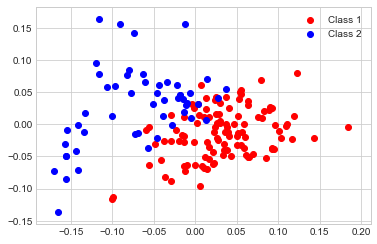

In [101]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(ineq_contr_dau))

plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Class 1', c='red')
plt.scatter(transformed[y==2][0], transformed[y==2][1], label='Class 2', c='blue')
#plt.scatter(transformed[y==3][0], transformed[y==3][1], label='Class 3', c='lightgreen')
plt.legend()
plt.show()

In [102]:
from scipy.cluster.hierarchy import fcluster
max_d = 0.59
clusters = fcluster(Z, max_d, criterion='distance')
y = clusters

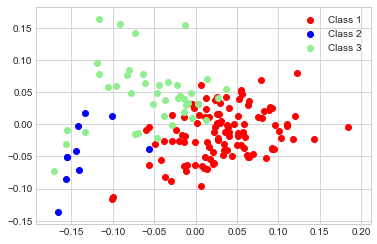

In [104]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(ineq_contr_dau))

plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Class 1', c='red')
plt.scatter(transformed[y==2][0], transformed[y==2][1], label='Class 2', c='blue')
plt.scatter(transformed[y==3][0], transformed[y==3][1], label='Class 3', c='lightgreen')
plt.legend()
plt.show()

#### Homogènies DAU:

In [130]:
eq_dau = pd.read_csv("dades/eq_dau.csv", delimiter=',' , encoding="latin-1")
eq_contr_dau = contr_dau[contr_dau.index.isin(eq_dau['user_id'])]

In [131]:
X = np.asarray(eq_contr_dau)
# generate the linkage matrix
Z = linkage(X, 'ward')

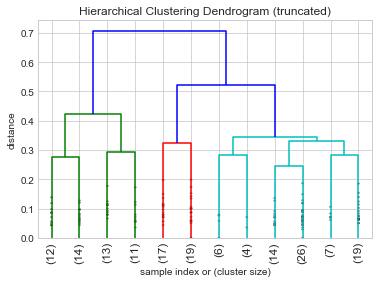

In [132]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [135]:
from scipy.cluster.hierarchy import fcluster
max_d = 0.50 # Selecting 3 clusters
clusters = fcluster(Z, max_d, criterion='distance')
y = clusters

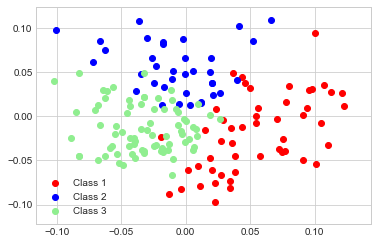

In [136]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(eq_contr_dau))

plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Class 1', c='red')
plt.scatter(transformed[y==2][0], transformed[y==2][1], label='Class 2', c='blue')
plt.scatter(transformed[y==3][0], transformed[y==3][1], label='Class 3', c='lightgreen')
plt.legend()
plt.show()

In [133]:
from scipy.cluster.hierarchy import fcluster
max_d = 0.55 # Selecting 2 clusters
clusters = fcluster(Z, max_d, criterion='distance')
y = clusters

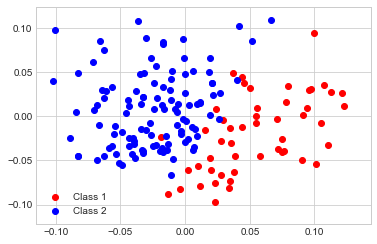

In [134]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(eq_contr_dau))

plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Class 1', c='red')
plt.scatter(transformed[y==2][0], transformed[y==2][1], label='Class 2', c='blue')
#plt.scatter(transformed[y==3][0], transformed[y==3][1], label='Class 3', c='lightgreen')
plt.legend()
plt.show()

#### VIL:

In [163]:
X = contr_vil
# generate the linkage matrix
Z = linkage(X, 'ward')

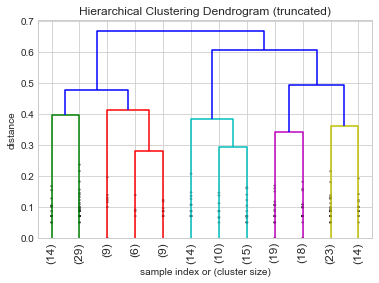

In [164]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [165]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

In [166]:
# set cut-off to 50
max_d = 0.5  # max_d as in max_distance

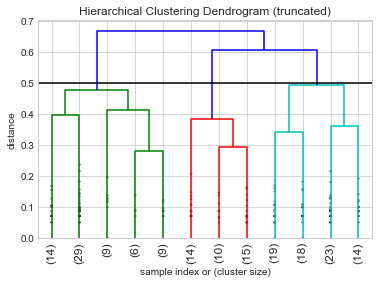

In [167]:
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
    max_d=max_d,  # plot a horizontal cut-off line
)
plt.show()

#### Elbow Method
https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/#Retrieve-the-Clusters

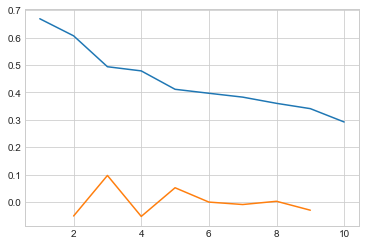

clusters: 3


In [139]:
last = Z[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print ("clusters:", k)

In [168]:
from scipy.cluster.hierarchy import fcluster
max_d = 0.5
clusters = fcluster(Z, max_d, criterion='distance')
y = clusters

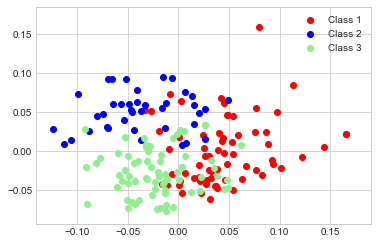

In [169]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(contr_vil))

plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Class 1', c='red')
plt.scatter(transformed[y==2][0], transformed[y==2][1], label='Class 2', c='blue')
plt.scatter(transformed[y==3][0], transformed[y==3][1], label='Class 3', c='lightgreen')
plt.legend()
plt.show()

### At game level: 

In [2]:
ronda_dau_data = pd.read_csv("dades/ronda_dau_partida.csv", delimiter=',' , encoding="latin-1")

In [3]:
ronda_dau_data.head()

,Unnamed: 0,num_ronda,partida_id,bucket
0,1,1,1,18
1,2,2,1,20
2,3,3,1,21
3,4,4,1,12
4,5,5,1,13


In [4]:
partides_info = ronda_dau_data.pivot(index='partida_id', columns='num_ronda', values= "bucket")

In [5]:
partides_info.shape

(54, 10)

In [6]:
partides_info

num_ronda,1,2,3,4,5,6,7,8,9,10
partida_id,,,,,,,,,,
1,18,20,21,12,13,15,13,7,6,6
2,19,23,21,23,18,16,13,12,18,10
3,17,15,18,21,18,18,14,7,10,5
4,11,18,17,9,13,12,14,6,12,12
5,16,14,11,17,11,13,9,5,13,19
6,13,16,16,14,13,11,11,12,10,6
7,13,16,14,15,13,10,14,13,12,2
8,14,14,15,17,19,11,13,15,12,15
9,18,17,14,14,16,17,9,9,8,7


In [78]:
for j in range(1,partides_info.shape[1]+1):
    for i in range(1,partides_info.shape[0]+1):
        if partides_info.loc[i,j] == 12:
            partides_info.loc[i, j] = "2-M"
        elif partides_info.loc[i,j] > 12:
            partides_info.loc[i, j] = "3-H"
        else: 
            partides_info.loc[i, j] = "1-L"



In [79]:
for i in range(0,partides_info.shape[0]):
    print(list(partides_info.iloc[i]))

['3-H', '3-H', '3-H', '2-M', '3-H', '3-H', '3-H', '1-L', '1-L', '1-L']
['3-H', '3-H', '3-H', '3-H', '3-H', '3-H', '3-H', '2-M', '3-H', '1-L']
['3-H', '3-H', '3-H', '3-H', '3-H', '3-H', '3-H', '1-L', '1-L', '1-L']
['1-L', '3-H', '3-H', '1-L', '3-H', '2-M', '3-H', '1-L', '2-M', '2-M']
['3-H', '3-H', '1-L', '3-H', '1-L', '3-H', '1-L', '1-L', '3-H', '3-H']
['3-H', '3-H', '3-H', '3-H', '3-H', '1-L', '1-L', '2-M', '1-L', '1-L']
['3-H', '3-H', '3-H', '3-H', '3-H', '1-L', '3-H', '3-H', '2-M', '1-L']
['3-H', '3-H', '3-H', '3-H', '3-H', '1-L', '3-H', '3-H', '2-M', '3-H']
['3-H', '3-H', '3-H', '3-H', '3-H', '3-H', '1-L', '1-L', '1-L', '1-L']
['3-H', '3-H', '3-H', '2-M', '1-L', '1-L', '1-L', '3-H', '3-H', '1-L']
['3-H', '3-H', '3-H', '3-H', '3-H', '3-H', '2-M', '3-H', '1-L', '1-L']
['3-H', '3-H', '3-H', '3-H', '3-H', '3-H', '3-H', '1-L', '1-L', '1-L']
['3-H', '3-H', '3-H', '3-H', '3-H', '3-H', '1-L', '1-L', '1-L', '1-L']
['3-H', '2-M', '1-L', '3-H', '3-H', '3-H', '3-H', '3-H', '1-L', '1-L']
['3-H'

In [80]:
from sklearn import metrics
metrics.mutual_info_score(partides_info.iloc[0], partides_info.iloc[6], contingency=None)

0.20189814062312159

In [81]:
A = np.zeros((partides_info.shape[0],partides_info.shape[0]))
for i in range(0,partides_info.shape[0]):
    for j in range(0,partides_info.shape[0]):
        A[i,j]=metrics.mutual_info_score(partides_info.iloc[i], partides_info.iloc[j], contingency=None)


In [ ]:
print(A)

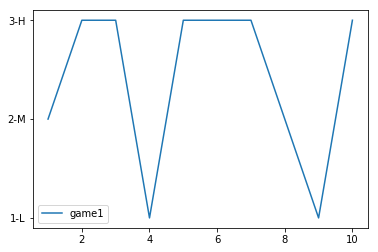

In [82]:
my_yticks = ["L","M","H"]
fig, ax = plt.subplots()
ax.plot(partides_info.columns, list(partides_info.iloc[52]), label="game1")
#ax.plot(partides_info.columns, list(partides_info.iloc[2]), label="game2")
#plt.xticks(list(partides_info.iloc[1]), my_yticks)
ax.legend()

plt.show()

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


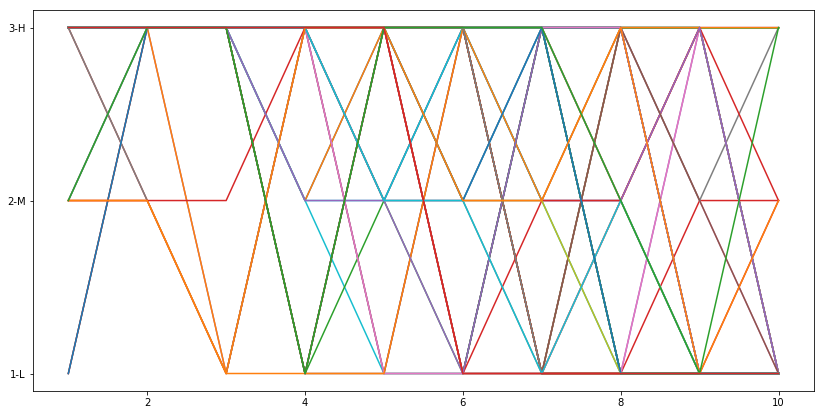

In [89]:
my_yticks = ["L","M","H"]
#fig, ax = plt.subplots(figsize=(14,7))

fig = plt.figure(figsize=(14,7))
#ax = plt.subplot(111)

for i in range(1,partides_info.shape[0]+1):
    ax = plt.subplot(111)
    ax.plot(partides_info.columns, list(partides_info.iloc[i-1]), label='$game %i$' % i)
#plt.xticks(list(partides_info.iloc[1]), my_yticks)
#ax.legend()

plt.show()

In [44]:
locs, labels = xticks()

NameError: name 'xticks' is not defined

In [2]:
dau_data = pd.read_csv("dau.csv", delimiter=',' , encoding="latin-1")
street_data = pd.read_csv("street.csv", delimiter=',' , encoding="latin-1" )

In [16]:
dau_data.drop('Unnamed: 0', axis=1, inplace=True)
street_data.drop('Unnamed: 0', axis=1, inplace=True)

In [17]:
dau_data.head()

,partida,user_id,seleccio.1,seleccio.2,seleccio.3,seleccio.4,seleccio.5,seleccio.6,seleccio.7,seleccio.8,...,comp_mean10,comp_last_mean2,comp_last_mean3,comp_last_mean4,comp_last_mean5,comp_last_mean6,comp_last_mean7,comp_last_mean8,comp_last_mean9,comp_last_mean10
0,1,1,4,3,4,3,2,2,4,3,...,0,1,1,0,1,0,1,1,1,0
1,1,2,3,4,4,3,4,4,0,0,...,1,1,1,0,1,1,0,0,0,1
2,1,3,4,4,4,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
3,1,6,2,1,4,3,2,4,4,1,...,1,0,1,0,1,1,1,0,0,1
4,1,7,2,4,2,1,1,2,1,0,...,0,1,0,0,0,0,0,0,0,0


In [41]:
dau_sel = dau_data.iloc[:,2:12].values
dau_mean = dau_data.iloc[:,14:24].values
dau_comp_mean = dau_data.iloc[:,24:34].values
dau_last_mean = dau_data.iloc[:,34:44].values

In [73]:
cond_coop = []
for i in range(np.shape(dau_sel)[0]):
    count = 0
    for j in range(1,10):
        if dau_sel[i,j]>dau_mean[i,j-1]:
            count+=1
    cond_coop.append(count)
    

[1, 5]

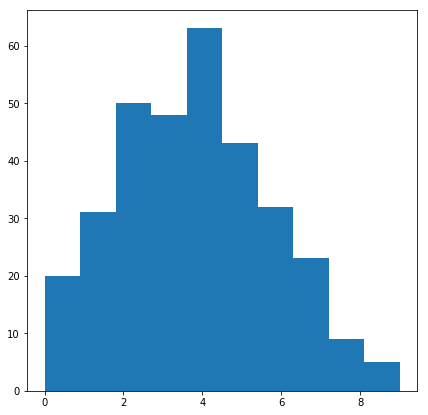

In [76]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
x = np.linspace(1, len(cond_coop), len(cond_coop))
#ax.set_title('Huber function')
#ax.set_xlabel('$u$')
#ax.set_ylabel(r'$\rho(u)$')
y = cond_coop
#plt.scatter(x, y, c="r")
plt.hist(y)
#plt.axhline(c="g")
#plt.axvline(c="g")
plt.show()